In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import sys
sys.argv = ['notebook.py', '-d', 'path/to/dataset']


In [4]:
#!pip install imutils
#!pip install opencv-python


In [5]:
'''ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset")
ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output loss/accuracy plot")
ap.add_argument("-m", "--model", type=str,
	default="mask_detectorch.model",
	help="path to output face mask detector model")
args = vars(ap.parse_args())'''

'ap = argparse.ArgumentParser()\nap.add_argument("-d", "--dataset", required=True,\n\thelp="path to input dataset")\nap.add_argument("-p", "--plot", type=str, default="plot.png",\n\thelp="path to output loss/accuracy plot")\nap.add_argument("-m", "--model", type=str,\n\tdefault="mask_detectorch.model",\n\thelp="path to output face mask detector model")\nargs = vars(ap.parse_args())'

In [6]:
args = {
    "dataset": r"D:\deep learning\Face Mask",  # Use raw string to handle Windows backslashes
    "plot": "plot.png",
    "model": "mask_detectorch.model"
}
args

{'dataset': 'D:\\deep learning\\Face Mask',
 'plot': 'plot.png',
 'model': 'mask_detectorch.model'}

In [7]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32


In [8]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

[INFO] loading images...


In [9]:
imagePaths

['D:\\deep learning\\Face Mask\\plot.png',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_anhu_0056.jpg',
 'D:\\deep learning\\Face Mask\\dataset\\without_mask\\0_0_anhu

In [10]:
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
    
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
image

C:\Users\anora\Downloads\anaconda\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[-0.4588235 ,  0.3803922 , -0.15294117],
        [-0.4588235 ,  0.3803922 , -0.15294117],
        [-0.54509807,  0.20784318, -0.2862745 ],
        ...,
        [-0.54509807, -0.4588235 , -0.5686275 ],
        [-0.47450978, -0.38823527, -0.4980392 ],
        [-0.47450978, -0.38823527, -0.4980392 ]],

       [[-0.4588235 ,  0.3803922 , -0.15294117],
        [-0.4588235 ,  0.3803922 , -0.15294117],
        [-0.54509807,  0.20784318, -0.2862745 ],
        ...,
        [-0.54509807, -0.4588235 , -0.5686275 ],
        [-0.47450978, -0.38823527, -0.4980392 ],
        [-0.47450978, -0.38823527, -0.4980392 ]],

       [[-0.4823529 ,  0.27058828, -0.23137254],
        [-0.4823529 ,  0.27058828, -0.23137254],
        [-0.6156863 ,  0.05098045, -0.41176468],
        ...,
        [-0.32549018, -0.26274508, -0.3490196 ],
        [-0.17647058, -0.09803921, -0.18431371],
        [-0.17647058, -0.09803921, -0.18431371]],

       ...,

       [[ 0.0196079 , -0.11372548, -0.17647058],
        [ 0

In [11]:
data = np.array(data, dtype="float32")
labels = np.array(labels)
data

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        ...,

        [[ 1.        ,  1.        ,  1

In [42]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [43]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [44]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


In [45]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


9406464/9406464 [==============================] - 3s 0us/step


In [46]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [47]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [48]:
for layer in baseModel.layers:
	layer.trainable = False

In [49]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


C:\Users\anora\Downloads\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [50]:
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
96/96 [==============================] - 86s 848ms/step - loss: 0.4123 - accuracy: 0.8509 - val_loss: 0.1562 - val_accuracy: 0.9805
Epoch 2/20
96/96 [==============================] - 92s 963ms/step - loss: 0.1571 - accuracy: 0.9612 - val_loss: 0.0862 - val_accuracy: 0.9831
Epoch 3/20
96/96 [==============================] - 97s 1s/step - loss: 0.1057 - accuracy: 0.9734 - val_loss: 0.0640 - val_accuracy: 0.9883
Epoch 4/20
96/96 [==============================] - 97s 1s/step - loss: 0.0839 - accuracy: 0.9773 - val_loss: 0.0547 - val_accuracy: 0.9896
Epoch 5/20
96/96 [==============================] - 101s 1s/step - loss: 0.0765 - accuracy: 0.9770 - val_loss: 0.0479 - val_accuracy: 0.9896
Epoch 6/20
96/96 [==============================] - 84s 873ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0441 - val_accuracy: 0.9896
Epoch 7/20
96/96 [==============================] - 87s 902ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0431 - val_

In [51]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)


[INFO] evaluating network...
25/25 [==============================] - 14s 524ms/step


In [52]:
predIdxs = np.argmax(predIdxs, axis=1)

In [53]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       384
without_mask       0.99      0.99      0.99       386

    accuracy                           0.99       770
   macro avg       0.99      0.99      0.99       770
weighted avg       0.99      0.99      0.99       770



In [54]:
print("[INFO] saving mask detector model...")
model.save(args["model"], save_format="h5")


[INFO] saving mask detector model...


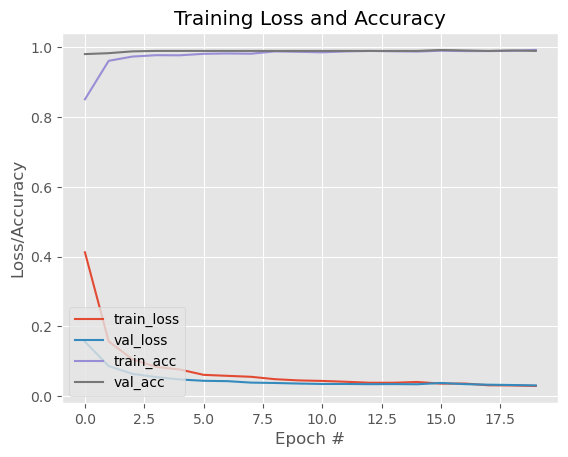

In [56]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
